# Image Processing with keras in Python

Para los computadores las imagenes no son mas que un conjunto de numeros.

Las imagenes en colores tienen 3 dimensiones:
    - Altura
    - Ancho
    - RGB

## 0 - Dataset

El dataset a usar durante todo este notebook lo pueden obtener en https://www.kaggle.com/paramaggarwal/fashion-product-images-small

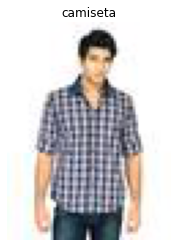

In [69]:
import matplotlib.pyplot as plt
ruta = "datasets/myntradataset/images/15970.jpg"
camiseta = plt.imread(ruta)
plt.imshow(camiseta)
plt.title("camiseta")
plt.axis('off')
plt.show()

El dataset viene con un csv en donde se indican las etiquetas de cada uno de los productos

In [72]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("datasets/myntradataset/styles.csv", error_bad_lines=False)

print(df.head())

      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  


b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

In [73]:
df[df['id'] == 15970]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt


¿Cuantas categorias distintas hay en el dataset?

In [52]:
df["articleType"].nunique()

143

In [53]:
df["articleType"].unique()

array(['Shirts', 'Jeans', 'Watches', 'Track Pants', 'Tshirts', 'Socks',
       'Casual Shoes', 'Belts', 'Flip Flops', 'Handbags', 'Tops', 'Bra',
       'Sandals', 'Shoe Accessories', 'Sweatshirts', 'Deodorant',
       'Formal Shoes', 'Bracelet', 'Lipstick', 'Flats', 'Kurtas',
       'Waistcoat', 'Sports Shoes', 'Shorts', 'Briefs', 'Sarees',
       'Perfume and Body Mist', 'Heels', 'Sunglasses', 'Innerwear Vests',
       'Pendant', 'Nail Polish', 'Laptop Bag', 'Scarves', 'Rain Jacket',
       'Dresses', 'Night suits', 'Skirts', 'Wallets', 'Blazers', 'Ring',
       'Kurta Sets', 'Clutches', 'Shrug', 'Backpacks', 'Caps', 'Trousers',
       'Earrings', 'Camisoles', 'Boxers', 'Jewellery Set', 'Dupatta',
       'Capris', 'Lip Gloss', 'Bath Robe', 'Mufflers', 'Tunics',
       'Jackets', 'Trunk', 'Lounge Pants', 'Face Wash and Cleanser',
       'Necklace and Chains', 'Duffel Bag', 'Sports Sandals',
       'Foundation and Primer', 'Sweaters', 'Free Gifts', 'Trolley Bag',
       'Tracksuits', 'S

In [54]:
df["articleType"].value_counts()[:10]

Tshirts         7067
Shirts          3217
Casual Shoes    2845
Watches         2542
Sports Shoes    2036
Kurtas          1844
Tops            1762
Handbags        1759
Heels           1323
Sunglasses      1073
Name: articleType, dtype: int64

Para usar menos memoria limitaremos el dataset a solo tres categorias Shirts, Casual Shoes y Watches

In [77]:
df = df[df["articleType"].isin(["Shirts", 'Watches', 'Casual Shoes'])]

In [78]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch


## 1- Clasificando imagenes

### 1.1- One Hot encoding

Vamos a crear un array en donde cada clasificacion corresponda a un elemento del vector

In [82]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# El termino ignore hara que las categorias que no estan presentes al momento de hacer un fit
# No aparezcan despues
enc = OneHotEncoder(handle_unknown='ignore')
oneHot = enc.fit_transform(np.array(df['articleType']).reshape(-1, 1))

In [86]:
oneHot.toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [90]:
enc.get_feature_names()

array(['x0_Casual Shoes', 'x0_Shirts', 'x0_Watches'], dtype=object)

In [100]:
df = pd.concat([df.reset_index(drop=True),
                pd.DataFrame(oneHot.toarray(), columns=enc.get_feature_names())], axis=1)

In [101]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,x0_Casual Shoes,x0_Shirts,x0_Watches
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,0.0,1.0,0.0
1,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,0.0,0.0,1.0
2,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt,0.0,1.0,0.0
3,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt,0.0,1.0,0.0
4,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch,0.0,0.0,1.0
